In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def regresionLineal(x,y,error):
    pesos = 1/(error**2)
    delta = sum(pesos)*sum(pesos*(x**2))-(sum(pesos*x))**2
    
    m = ((sum(pesos)*sum(pesos*x*y))-(sum(pesos*x)*sum(pesos*y)))/(delta)
    c = ((sum(pesos*(x**2))*sum(pesos*y))-(sum(pesos*x)*sum(pesos*x*y)))/(delta)
    
    delta_m = np.sqrt(sum(pesos)/delta)
    delta_c = np.sqrt(sum(pesos*(x**2))/delta)
    
    fun = lambda x0:m*x0 + c 
        
    ling = {"m":m,"c":c,"delta_m":delta_m,"delta_c":delta_c,"fun":fun}
    
    return ling   

# Actividad 1 Caracterización

In [3]:
corrienteStr = """0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9"""

miliCamagneticoStr = """30.4
49.3
71.3
93.4
118.5
140.0
163.0
184.3
200.6"""

{'m': 0.2193,
 'c': 0.007105555555555556,
 'delta_m': 0.00012909944487358055,
 'delta_c': 7.264831572567789e-05,
 'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>}

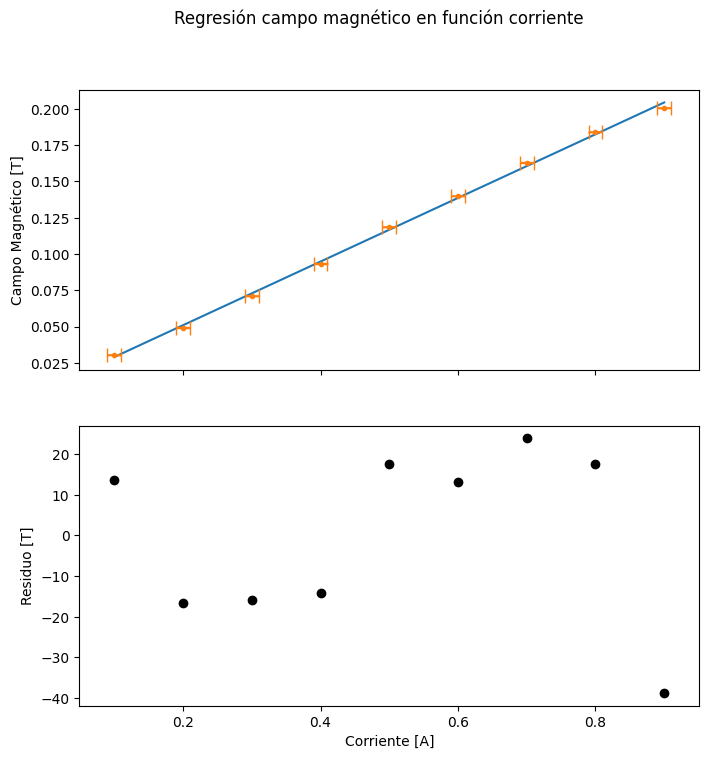

In [4]:
linea1 = corrienteStr.split('\n')
lines2 = miliCamagneticoStr.split('\n')

corriente = np.array(linea1, dtype=float)
camagnetico = np.array(lines2, dtype=float)*0.001

delta_cor = np.zeros_like(camagnetico)+0.01
delta_campo = (np.zeros_like(camagnetico) + 0.1)*0.001

reg = regresionLineal(corriente,camagnetico,delta_campo)

y_reg = reg["fun"](corriente)

res = (camagnetico - y_reg)/delta_campo

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

plt.suptitle("Regresión campo magnético en función corriente")
ax1.plot(corriente,y_reg)

ax1.errorbar(corriente, camagnetico, yerr=delta_campo, xerr=delta_cor, fmt=".",capsize=4.9,markersize=6,elinewidth=1.1)
ax1.set_ylabel("Campo Magnético [T]")

ax2.scatter(corriente,res, color="black")
ax2.set_ylabel("Residuo [T]")
ax2.set_xlabel("Corriente [A]")

fig.savefig("RegreCampo.jpg")
reg

In [5]:
def DeltaCampo(B):
    m = reg["m"]
    delta_m = reg["delta_m"]
    I = (B-reg["c"])/m
    delta_I = 0.01
    return np.sqrt((m*delta_I)**2 + (delta_m*I))

# Activididad 2

### 1-

### N

In [6]:
miliCorriente = """-30
-27
-24
-21
-18
-15
-12
-9
-6
-3
0
3
6
9
12
15
18
21
24
27
30"""

miliVolH_200mT = """32.6
29.4
26.2
22.9
19.4
16.7
13.0
9.8
6.4
3.1
0.1
-4.0
-7.2
-10.5
-13.4
-17.3
-20.9
-23.6
-26.8
-30.2
-33.8"""

miliVolH_150mT = """25.0
22.4
19.2
17.2
15.0
11.9
9.8
7.0
5.3
2.1
0.7
-3.6
-6.2
-8.5
-11.2
-13.7
-15.4
-18.3
-20.2
-21.3
-25.6"""

miliVolH_175mT = """29.2
26.1
24.4
20.2
17.1
14.2
11.1
8.9
5.7
2.5
-0.4
-4.2
-7.1
-9.2
-12.7
-15.7
-18.4
-20.8
-23.9
-26.6
-29.6"""

miliVolH_225mT = """37.9
33.3
30.6
26.8
22.5
19.1
15.5
11.7
7.3
4.5
0.3
-4.6
-7.6
-11.3
-14.5
-19.3
-22.7
-26.5
-30.5
-33.7
-38.7"""

miliVolH_250mT = """43.0
39.2
35.6
30.3
25.3
21.3
18.2
13.0
9.0
5.0
0.6
-4.9
-7.8
-13.4
-17.4
-22.3
-25.5
-30.1
-32.4
-38.3
-41.7"""

({'m': -0.8366233766233766,
  'c': -0.0004,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -0.987012987012987,
  'c': -0.0004380952380952381,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -1.1093073593073592,
  'c': -0.00038571428571428546,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -1.264935064935065,
  'c': 4.7619047619045405e-06,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -1.4282251082251083,
  'c': 0.00031904761904761903,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>})

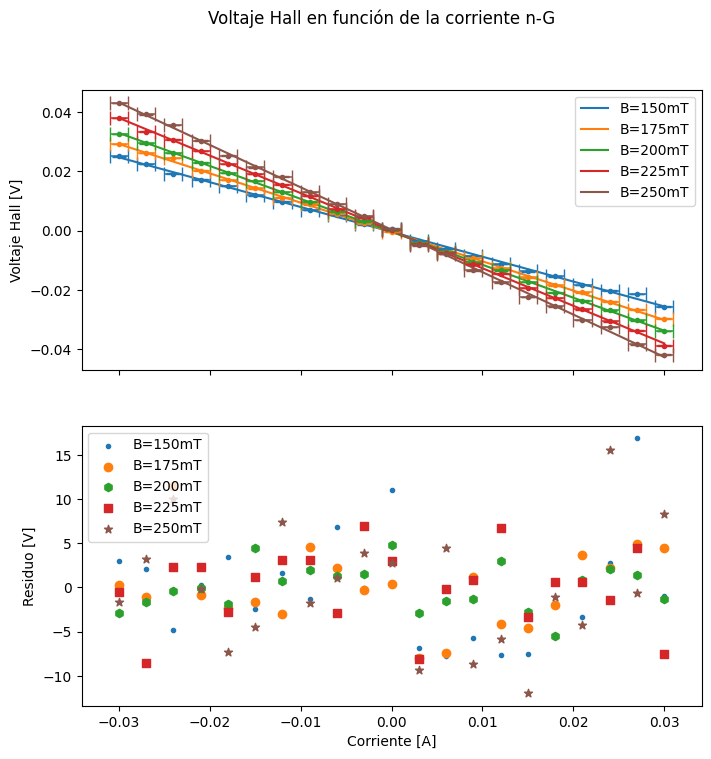

In [7]:
linea1 = miliCorriente.split('\n')
linea2 = miliVolH_150mT.split('\n')
linea3 = miliVolH_175mT.split('\n')
linea4 = miliVolH_200mT.split('\n')
linea5 = miliVolH_225mT.split('\n')
linea6 = miliVolH_250mT.split('\n')

corriente = np.array(linea1, dtype=float)*0.001
vol_H_150 = np.array(linea2, dtype=float)*0.001
vol_H_175 = np.array(linea3, dtype=float)*0.001
vol_H_200 = np.array(linea4, dtype=float)*0.001
vol_H_225 = np.array(linea5, dtype=float)*0.001
vol_H_250 = np.array(linea6, dtype=float)*0.001

delta_corriente = (np.zeros_like(corriente) + 1)*0.001
delta_voltaje = (np.zeros_like(vol_H_150) + 0.1)*0.001

reg_150 = regresionLineal(corriente, vol_H_150, delta_voltaje)
reg_175 = regresionLineal(corriente, vol_H_175, delta_voltaje)
reg_200 = regresionLineal(corriente, vol_H_200, delta_voltaje)
reg_225 = regresionLineal(corriente, vol_H_225, delta_voltaje)
reg_250 = regresionLineal(corriente, vol_H_250, delta_voltaje)

y_reg_150 = reg_150["fun"](corriente)
y_reg_175 = reg_175["fun"](corriente)
y_reg_200 = reg_200["fun"](corriente)
y_reg_225 = reg_225["fun"](corriente)
y_reg_250 = reg_250["fun"](corriente)

res_150 = (vol_H_150 - y_reg_150)/delta_voltaje
res_175 = (vol_H_175 - y_reg_175)/delta_voltaje
res_200 = (vol_H_200 - y_reg_200)/delta_voltaje
res_225 = (vol_H_225 - y_reg_225)/delta_voltaje
res_250 = (vol_H_250 - y_reg_250)/delta_voltaje

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.suptitle("Voltaje Hall en función de la corriente n-G")
ax1.plot(corriente, y_reg_150, label="B=150mT", color = colors[0])
ax1.plot(corriente, y_reg_175, label="B=175mT", color = colors[1])
ax1.plot(corriente, y_reg_200, label="B=200mT", color = colors[2])
ax1.plot(corriente, y_reg_225, label="B=225mT", color = colors[3])
ax1.plot(corriente, y_reg_250, label="B=250mT", color = colors[4])

ax1.errorbar(corriente, vol_H_150, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[0], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_175, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[1], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_200, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[2], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_225, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[3], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_250, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[4], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.set_ylabel("Voltaje Hall [V]")
ax1.legend()

ax2.scatter(corriente,res_150,color = colors[0], label="B=150mT", marker=".")
ax2.scatter(corriente,res_175,color = colors[1], label="B=175mT", marker="o")
ax2.scatter(corriente,res_200,color = colors[2], label="B=200mT", marker="h")
ax2.scatter(corriente,res_225,color = colors[3], label="B=225mT", marker="s")
ax2.scatter(corriente,res_250,color = colors[4], label="B=250mT", marker="*")
ax2.set_ylabel("Residuo [V]")
ax2.set_xlabel("Corriente [A]")
ax2.legend()

fig.savefig("Hall_Corriente_n.jpg")
reg_150,reg_175,reg_200,reg_225,reg_250

In [8]:
w = 1e-3

RH_150 = reg_150["m"]*w/(150*0.001)
RH_175 = reg_175["m"]*w/(175*0.001)
RH_200 = reg_200["m"]*w/(200*0.001)
RH_225 = reg_225["m"]*w/(225*0.001)
RH_250 = reg_250["m"]*w/(250*0.001)

delta_RH_150 = np.abs(RH_150)*np.sqrt((reg_150["delta_m"]/reg_150["m"])**2 + (DeltaCampo(150*0.001)/150*0.001)**2)
delta_RH_175 = np.abs(RH_175)*np.sqrt((reg_175["delta_m"]/reg_175["m"])**2 + (DeltaCampo(175*0.001)/175*0.001)**2)
delta_RH_200 = np.abs(RH_200)*np.sqrt((reg_200["delta_m"]/reg_200["m"])**2 + (DeltaCampo(200*0.001)/200*0.001)**2)
delta_RH_225 = np.abs(RH_225)*np.sqrt((reg_225["delta_m"]/reg_225["m"])**2 + (DeltaCampo(225*0.001)/225*0.001)**2)
delta_RH_250 = np.abs(RH_250)*np.sqrt((reg_250["delta_m"]/reg_250["m"])**2 + (DeltaCampo(200*0.001)/250*0.001)**2)

pesos_150 = 1/(delta_RH_150**2)
pesos_175 = 1/(delta_RH_175**2)
pesos_200 = 1/(delta_RH_200**2)
pesos_225 = 1/(delta_RH_225**2)
pesos_250 = 1/(delta_RH_250**2)

RH_prom = (RH_150*pesos_150 + RH_175*pesos_175 + RH_200*pesos_200 + RH_225*pesos_225 + RH_250*pesos_250)/(pesos_150 + pesos_175 + pesos_200 + pesos_225 + pesos_250)

delta_RH_prom = np.sqrt(1/(1/(delta_RH_150**2) + 1/(delta_RH_175**2) + 1/(delta_RH_200**2) + 1/(delta_RH_225**2) + 1/(delta_RH_150**2)))

RH_prom,delta_RH_prom

(-0.005632722025443208, 2.946134407823197e-06)

### P

In [9]:
miliCorriente = """-30
-27
-24
-21
-18
-15
-12
-9
-6
-3
0
3
6
9
12
15
18
21
24
27
30"""

miliVolH_200mT = """-26.9
-23.1
-21.1
-18.4
-16
-13.2
-10.5
-8.4
-5.3
-2.6
-0.8
3.4
6.4
8.8
11.1
13.8
16.7
19
20.9
24.4
27"""

miliVolH_150mT = """-19.5
-17.4
-16.4
-13.7
-11.6
-9.8
-7.3
-5.9
-3.6
-2.2
0.0
3.4
4.8
6.9
9.2
11.2
12.9
15.0
16.8
18.3
20.4"""

miliVolH_175mT = """-23.1
-20.5
-18.7
-16
-13.6
-11.6
-8.7
-6.6
-5.1
-2.5
0.0
3.4
5.3
8.3
10.1
12.4
14.6
17.0
18.4
21.0
24.4"""

miliVolH_225mT = """-30.1
-27.1
-24.3
-20.8
-18.1
-15.1
-12.1
-9.5
-7.1
-3.5
-0.3
3.8
6.3
9.7
12.8
15.4
18.4
20.9
24.1
27.5
30.0"""

miliVolH_250mT = """-34.0
-30.9
-27.6
-24.5
-21.0
-18.2
-13.7
-10.6
-8.2
-5.2
-1.0
4.4
7.2
11.0
14.1
17.1
20.2
23.3
27.0
30.3
34.3"""

({'m': 0.6777489177489178,
  'c': 0.0005476190476190475,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 0.7844588744588744,
  'c': 0.0004047619047619048,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 0.8930303030303031,
  'c': 0.0002476190476190476,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 1.0105194805194806,
  'c': 4.2857142857142856e-05,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 1.1451515151515153,
  'c': -0.0002857142857142859,
  'delta_m': 0.0012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>})

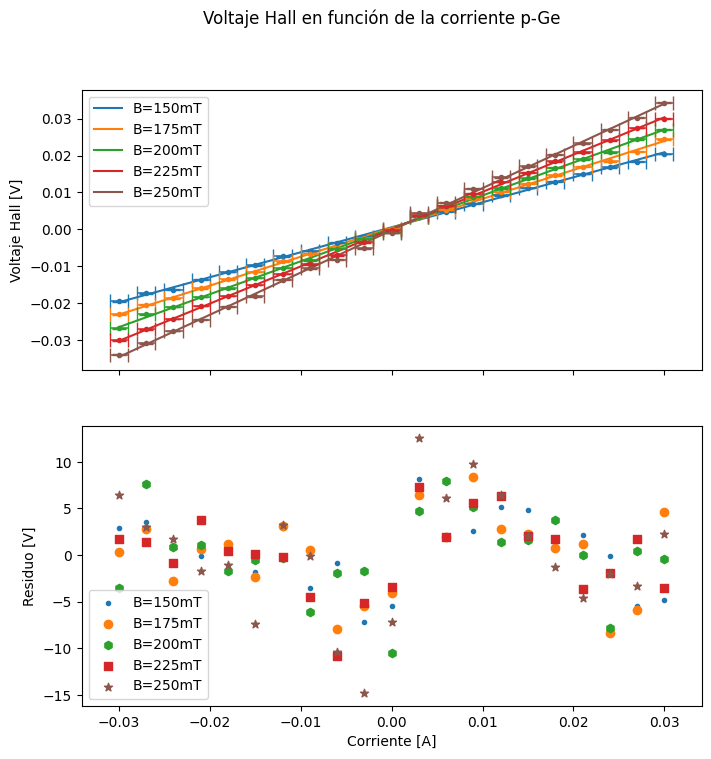

In [10]:
linea1 = miliCorriente.split('\n')
linea2 = miliVolH_150mT.split('\n')
linea3 = miliVolH_175mT.split('\n')
linea4 = miliVolH_200mT.split('\n')
linea5 = miliVolH_225mT.split('\n')
linea6 = miliVolH_250mT.split('\n')

corriente = np.array(linea1, dtype=float)*0.001
vol_H_150 = np.array(linea2, dtype=float)*0.001
vol_H_175 = np.array(linea3, dtype=float)*0.001
vol_H_200 = np.array(linea4, dtype=float)*0.001
vol_H_225 = np.array(linea5, dtype=float)*0.001
vol_H_250 = np.array(linea6, dtype=float)*0.001

delta_corriente = (np.zeros_like(corriente) + 1)*0.001
delta_voltaje = (np.zeros_like(vol_H_150) + 0.1)*0.001

reg_150 = regresionLineal(corriente, vol_H_150, delta_voltaje)
reg_175 = regresionLineal(corriente, vol_H_175, delta_voltaje)
reg_200 = regresionLineal(corriente, vol_H_200, delta_voltaje)
reg_225 = regresionLineal(corriente, vol_H_225, delta_voltaje)
reg_250 = regresionLineal(corriente, vol_H_250, delta_voltaje)

y_reg_150 = reg_150["fun"](corriente)
y_reg_175 = reg_175["fun"](corriente)
y_reg_200 = reg_200["fun"](corriente)
y_reg_225 = reg_225["fun"](corriente)
y_reg_250 = reg_250["fun"](corriente)

res_150 = (vol_H_150 - y_reg_150)/delta_voltaje
res_175 = (vol_H_175 - y_reg_175)/delta_voltaje
res_200 = (vol_H_200 - y_reg_200)/delta_voltaje
res_225 = (vol_H_225 - y_reg_225)/delta_voltaje
res_250 = (vol_H_250 - y_reg_250)/delta_voltaje

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.suptitle("Voltaje Hall en función de la corriente p-Ge")
ax1.plot(corriente, y_reg_150, label="B=150mT", color = colors[0])
ax1.plot(corriente, y_reg_175, label="B=175mT", color = colors[1])
ax1.plot(corriente, y_reg_200, label="B=200mT", color = colors[2])
ax1.plot(corriente, y_reg_225, label="B=225mT", color = colors[3])
ax1.plot(corriente, y_reg_250, label="B=250mT", color = colors[4])

ax1.errorbar(corriente, vol_H_150, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[0], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_175, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[1], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_200, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[2], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_225, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[3], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.errorbar(corriente, vol_H_250, yerr=delta_voltaje, xerr=delta_corriente, fmt=".", color = colors[4], capsize=4.9, markersize=6, elinewidth=1.1)
ax1.set_ylabel("Voltaje Hall [V]")
ax1.legend()

ax2.scatter(corriente,res_150,color = colors[0], label="B=150mT", marker=".")
ax2.scatter(corriente,res_175,color = colors[1], label="B=175mT", marker="o")
ax2.scatter(corriente,res_200,color = colors[2], label="B=200mT", marker="h")
ax2.scatter(corriente,res_225,color = colors[3], label="B=225mT", marker="s")
ax2.scatter(corriente,res_250,color = colors[4], label="B=250mT", marker="*")
ax2.set_ylabel("Residuo [V]")
ax2.set_xlabel("Corriente [A]")
ax2.legend()

fig.savefig("Hall_Corriente_p.jpg")
reg_150,reg_175,reg_200,reg_225,reg_250

In [11]:
w = 1e-3

RH_150 = reg_150["m"]*w/(150*0.001)
RH_175 = reg_175["m"]*w/(175*0.001)
RH_200 = reg_200["m"]*w/(200*0.001)
RH_225 = reg_225["m"]*w/(225*0.001)
RH_250 = reg_250["m"]*w/(250*0.001)

delta_RH_150 = np.abs(RH_150)*np.sqrt((reg_150["delta_m"]/reg_150["m"])**2 + (DeltaCampo(150*0.001)/150*0.001)**2)
delta_RH_175 = np.abs(RH_175)*np.sqrt((reg_175["delta_m"]/reg_175["m"])**2 + (DeltaCampo(175*0.001)/175*0.001)**2)
delta_RH_200 = np.abs(RH_200)*np.sqrt((reg_200["delta_m"]/reg_200["m"])**2 + (DeltaCampo(200*0.001)/200*0.001)**2)
delta_RH_225 = np.abs(RH_225)*np.sqrt((reg_225["delta_m"]/reg_225["m"])**2 + (DeltaCampo(225*0.001)/225*0.001)**2)
delta_RH_250 = np.abs(RH_250)*np.sqrt((reg_250["delta_m"]/reg_250["m"])**2 + (DeltaCampo(200*0.001)/250*0.001)**2)

pesos_150 = 1/(delta_RH_150**2)
pesos_175 = 1/(delta_RH_175**2)
pesos_200 = 1/(delta_RH_200**2)
pesos_225 = 1/(delta_RH_225**2)
pesos_250 = 1/(delta_RH_250**2)

RH_prom = (RH_150*pesos_150 + RH_175*pesos_175 + RH_200*pesos_200 + RH_225*pesos_225 + RH_250*pesos_250)/(pesos_150 + pesos_175 + pesos_200 + pesos_225 + pesos_250)

delta_RH_prom = np.sqrt(1/(1/(delta_RH_150**2) + 1/(delta_RH_175**2) + 1/(delta_RH_200**2) + 1/(delta_RH_225**2) + 1/(delta_RH_150**2)))

RH_prom,delta_RH_prom

(0.004514925882197433, 2.946134406544261e-06)

## 2-

### N

In [12]:
miliCampo = """-300
-270
-240
-210
-180
-150
-120
-90
-60
-30
0
30
60
90
120
150
180
210
240
270
300"""

miliVol_n_30 = """-61.7
-57.4
-52.4
-46.8
-41.2
-35.6
-29.9
-24.3
-18.4
-12.5
-6.8
0.9
5.5
11.7
17.2
23.6
28.7
33.9
39.9
45.1
51.0"""

miliVol_n_15 = """-34.5
-31.7
-29.4
-26.3
-23.1
-20.4
-17.1
-14.2
-10.7
-7.5
-4.4
-0.03
2.4
5.4
8.5
11.9
15.1
17.9
21.2
24.2
27.2"""

miliVol_p_15 = """24.9
22.9
20.6
18.2
15.8
13.4
10.8
8.1
5.5
2.9
0.5
-2.6
-4.9
-7.7
-10.1
-12.9
-15.3
-17.7
-20.3
-22.6
-25.1"""

miliVol_p_30 = """53.7
49.2
44.9
40.1
35.0
29.8
24.4
18.8
13.3
8.0
3.2
-3.6
-8.6
-14.0
-19.1
-25.3
-29.9
-34.8
-40.3
-45.3
-51.1"""

C:\Users\danie\AppData\Local\Temp\ipykernel_23812\2114950449.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((m*delta_I)**2 + (delta_m*I))


({'m': 0.1915930735930736,
  'c': -0.006166666666666667,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 0.10475627705627706,
  'c': -0.004072857142857143,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -0.084995670995671,
  'c': 0.0002095238095238095,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -0.17736363636363636,
  'c': 0.002304761904761905,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>})

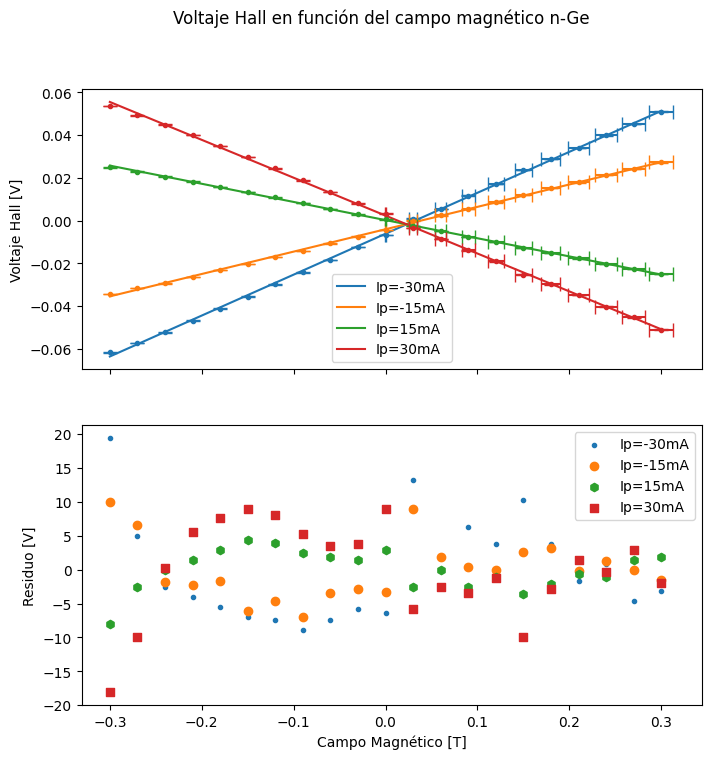

In [13]:
linea1 = miliCampo.split('\n')
linea2 = miliVol_n_30.split('\n')
linea3 = miliVol_n_15.split('\n')
linea4 = miliVol_p_15.split('\n')
linea5 = miliVol_p_30.split('\n')

campo = np.array(linea1, dtype=float)*0.001
vol_n_30 = np.array(linea2, dtype=float)*0.001
vol_n_15 = np.array(linea3, dtype=float)*0.001
vol_p_15 = np.array(linea4, dtype=float)*0.001
vol_p_30 = np.array(linea5, dtype=float)*0.001

delta_campo = DeltaCampo(campo)
delta_voltaje = (np.zeros_like(vol_n_30) + 0.1)*0.001

reg_n_30 = regresionLineal(campo, vol_n_30, delta_voltaje)
reg_n_15 = regresionLineal(campo, vol_n_15, delta_voltaje)
reg_p_15 = regresionLineal(campo, vol_p_15, delta_voltaje)
reg_p_30 = regresionLineal(campo, vol_p_30, delta_voltaje)

y_reg_n_30 = reg_n_30["fun"](campo)
y_reg_n_15 = reg_n_15["fun"](campo)
y_reg_p_15 = reg_p_15["fun"](campo)
y_reg_p_30 = reg_p_30["fun"](campo)

res_n_30 = (vol_n_30 - y_reg_n_30)/delta_voltaje
res_n_15 = (vol_n_15 - y_reg_n_15)/delta_voltaje
res_p_15 = (vol_p_15 - y_reg_p_15)/delta_voltaje
res_p_30 = (vol_p_30 - y_reg_p_30)/delta_voltaje


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.suptitle("Voltaje Hall en función del campo magnético n-Ge")
ax1.plot(campo, y_reg_n_30, label="Ip=-30mA", color = colors[0])
ax1.plot(campo, y_reg_n_15, label="Ip=-15mA", color = colors[1])
ax1.plot(campo, y_reg_p_15, label="Ip=15mA", color = colors[2])
ax1.plot(campo, y_reg_p_30, label="Ip=30mA", color = colors[3])

ax1.errorbar(campo, vol_n_30, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[0], capsize=4.9)
ax1.errorbar(campo, vol_n_15, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[1], capsize=4.9)
ax1.errorbar(campo, vol_p_15, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[2], capsize=4.9)
ax1.errorbar(campo, vol_p_30, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[3], capsize=4.9)
ax1.set_ylabel("Voltaje Hall [V]")
ax1.legend()

ax2.scatter(campo,res_n_30,color = colors[0], label="Ip=-30mA", marker=".")
ax2.scatter(campo,res_n_15,color = colors[1], label="Ip=-15mA", marker="o")
ax2.scatter(campo,res_p_15,color = colors[2], label="Ip=15mA", marker="h")
ax2.scatter(campo,res_p_30,color = colors[3], label="Ip=30mA", marker="s")
ax2.set_ylabel("Residuo [V]")
ax2.set_xlabel("Campo Magnético [T]")
ax2.legend()

fig.savefig("Hall_Campo_n.jpg")
reg_n_30,reg_n_15,reg_p_15,reg_p_30

In [14]:
w = 1e-3
l = 2e-2
d = 1e-2

Vl_n_30 = -1.189
Vl_n_15 = -0.648
Vl_p_15 = 0.536
Vl_p_30 = 1.103

delta_Vl = 0.001

RH_n_30 = reg_n_30["m"]*w/(-30*0.001)
RH_n_15 = reg_n_15["m"]*w/(-15*0.001)
RH_p_15 = reg_p_15["m"]*w/(15*0.001)
RH_p_30 = reg_p_30["m"]*w/(30*0.001)

delta_RH_n_30 = np.abs(RH_n_30)*np.sqrt((reg_n_30["delta_m"]/reg_n_30["m"])**2 + (0.001/30)**2)
delta_RH_n_15 = np.abs(RH_n_15)*np.sqrt((reg_n_15["delta_m"]/reg_n_15["m"])**2 + (0.001/15)**2)
delta_RH_p_15 = np.abs(RH_p_15)*np.sqrt((reg_p_15["delta_m"]/reg_p_15["m"])**2 + (0.001/15)**2)
delta_RH_p_30 = np.abs(RH_p_30)*np.sqrt((reg_p_30["delta_m"]/reg_p_30["m"])**2 + (0.001/30)**2)

pesos_n_30 = 1/(delta_RH_n_30**2)
pesos_n_15 = 1/(delta_RH_n_15**2)
pesos_p_15 = 1/(delta_RH_p_15**2)
pesos_p_30 = 1/(delta_RH_p_30**2)

movi_n_30 = np.abs(RH_n_30)*l*(-30)/(Vl_n_30*w*d)
movi_n_15 = np.abs(RH_n_15)*l*(-15)/(Vl_n_15*w*d)
movi_p_15 = np.abs(RH_p_15)*l*(15)/(Vl_p_15*w*d)
movi_p_30 = np.abs(RH_p_30)*l*(30)/(Vl_p_30*w*d)

delta_movi_n_30 = movi_n_30*np.sqrt((delta_RH_n_30/RH_n_30)**2 + (0.001/30)**2 + (delta_Vl/Vl_n_30)**2)
delta_movi_n_15 = movi_n_15*np.sqrt((delta_RH_n_15/RH_n_15)**2 + (0.001/15)**2 + (delta_Vl/Vl_n_15)**2)
delta_movi_p_15 = movi_p_15*np.sqrt((delta_RH_p_15/RH_p_15)**2 + (0.001/15)**2 + (delta_Vl/Vl_p_15)**2)
delta_movi_p_30 = movi_p_30*np.sqrt((delta_RH_p_30/RH_p_30)**2 + (0.001/30)**2 + (delta_Vl/Vl_p_30)**2)

pesos_movi_n_30 = 1/(delta_movi_n_30**2)
pesos_movi_n_15 = 1/(delta_movi_n_15**2)
pesos_movi_p_15 = 1/(delta_movi_p_15**2)
pesos_movi_p_30 = 1/(delta_movi_p_30**2)

RH_prom = (RH_n_30*pesos_n_30 + RH_n_15*delta_RH_n_15 + RH_p_15*delta_RH_p_15 + RH_p_30*delta_RH_p_30)/(pesos_n_30 + pesos_n_15 + pesos_p_15 + pesos_p_30)
delta_RH_prom = np.sqrt(1/(1/(delta_RH_n_30**2) + 1/(delta_RH_n_15**2) + 1/(delta_RH_p_15**2) + 1/(delta_RH_p_30**2)))

movi_prom = (movi_n_30*pesos_movi_n_30 + movi_n_15*pesos_movi_n_15 + movi_p_15*pesos_movi_p_15 + movi_p_30*pesos_movi_p_30)/(pesos_movi_n_30 + pesos_movi_n_15 + pesos_movi_p_15 + pesos_movi_p_30)
delta_movi_prom = np.sqrt(1/(1/(delta_movi_n_30**2) + 1/(delta_movi_n_15**2) + 1/(delta_movi_p_15**2) + 1/(delta_movi_p_30**2) ))

RH_prom,delta_RH_prom,movi_prom,delta_movi_prom

(-0.002554149910426239,
 2.535823064793429e-06,
 321.71122137602515,
 0.2199967107347583)

### P

In [15]:
miliCampo = """-300
-270
-240
-210
-180
-150
-120
-90
-60
-30
0
30
60
90
120
150
180
210
240
270
300"""

miliVol_n_30 = """53.9
50.6
46.9
42.7
38
33.4
28.5
23.8
18.3
13.4
7.8
0.5
-3.5
-8.8
-14.2
-19.1
-23.6
-28
-32.7
-36.8
-41.0"""

miliVol_n_15 = """30.2
28.5
26.4
24.2
21.7
19.2
16.4
13.7
10.8
7.9
4.8
1.6
-1.1
-4.1
-6.9
-9.9
-12.4
-14.9
-17.5
-19.7
-22.1"""

miliVol_p_15 = """-22.1
-20.4
-18.8
-17
-15.1
-13.1
-10.7
-8.6
-6.2
-3.9
-1.6
1.3
3.3
5.9
8.1
10.4
12.5
14.5
16.6
18.5
20.5"""

miliVol_p_30 = """-46.9
-43.7
-40.5
-36.8
-32.6
-28.6
-23.9
-19.2
-14.2
-9.5
-4.6
1.3
5.5
10.8
15.5
20.0
24.5
28.6
33.0
37.0
40.9"""

C:\Users\danie\AppData\Local\Temp\ipykernel_23812\2114950449.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((m*delta_I)**2 + (delta_m*I))


({'m': -0.16556277056277055,
  'c': 0.007147619047619048,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': -0.09127705627705628,
  'c': 0.00460952380952381,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 0.07384415584415585,
  'c': -0.0012333333333333332,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 0.15296536796536797,
  'c': -0.003971428571428571,
  'delta_m': 0.00012012499502607452,
  'delta_c': 2.1821789023599237e-05,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>})

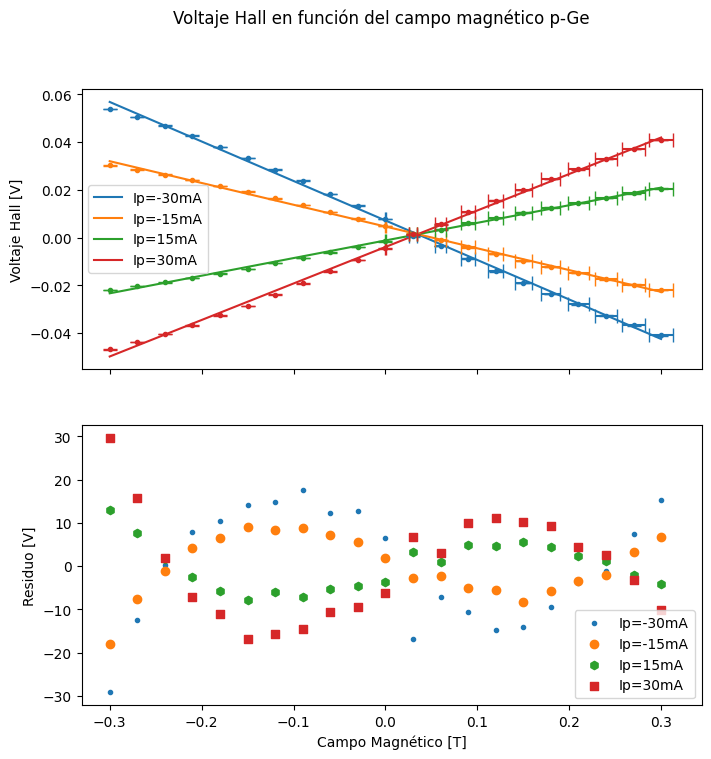

In [16]:
linea1 = miliCampo.split('\n')
linea2 = miliVol_n_30.split('\n')
linea3 = miliVol_n_15.split('\n')
linea4 = miliVol_p_15.split('\n')
linea5 = miliVol_p_30.split('\n')

campo = np.array(linea1, dtype=float)*0.001
vol_n_30 = np.array(linea2, dtype=float)*0.001
vol_n_15 = np.array(linea3, dtype=float)*0.001
vol_p_15 = np.array(linea4, dtype=float)*0.001
vol_p_30 = np.array(linea5, dtype=float)*0.001

delta_campo = DeltaCampo(campo)
delta_voltaje = (np.zeros_like(vol_n_30) + 0.1)*0.001

reg_n_30 = regresionLineal(campo, vol_n_30, delta_voltaje)
reg_n_15 = regresionLineal(campo, vol_n_15, delta_voltaje)
reg_p_15 = regresionLineal(campo, vol_p_15, delta_voltaje)
reg_p_30 = regresionLineal(campo, vol_p_30, delta_voltaje)

y_reg_n_30 = reg_n_30["fun"](campo)
y_reg_n_15 = reg_n_15["fun"](campo)
y_reg_p_15 = reg_p_15["fun"](campo)
y_reg_p_30 = reg_p_30["fun"](campo)

res_n_30 = (vol_n_30 - y_reg_n_30)/delta_voltaje
res_n_15 = (vol_n_15 - y_reg_n_15)/delta_voltaje
res_p_15 = (vol_p_15 - y_reg_p_15)/delta_voltaje
res_p_30 = (vol_p_30 - y_reg_p_30)/delta_voltaje


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.suptitle("Voltaje Hall en función del campo magnético p-Ge")
ax1.plot(campo, y_reg_n_30, label="Ip=-30mA", color = colors[0])
ax1.plot(campo, y_reg_n_15, label="Ip=-15mA", color = colors[1])
ax1.plot(campo, y_reg_p_15, label="Ip=15mA", color = colors[2])
ax1.plot(campo, y_reg_p_30, label="Ip=30mA", color = colors[3])

ax1.errorbar(campo, vol_n_30, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[0], capsize=4.9)
ax1.errorbar(campo, vol_n_15, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[1], capsize=4.9)
ax1.errorbar(campo, vol_p_15, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[2], capsize=4.9)
ax1.errorbar(campo, vol_p_30, yerr=delta_voltaje, xerr=delta_campo, fmt=".", color = colors[3], capsize=4.9)
ax1.set_ylabel("Voltaje Hall [V]")
ax1.legend()

ax2.scatter(campo,res_n_30,color = colors[0], label="Ip=-30mA", marker=".")
ax2.scatter(campo,res_n_15,color = colors[1], label="Ip=-15mA", marker="o")
ax2.scatter(campo,res_p_15,color = colors[2], label="Ip=15mA", marker="h")
ax2.scatter(campo,res_p_30,color = colors[3], label="Ip=30mA", marker="s")
ax2.set_ylabel("Residuo [V]")
ax2.set_xlabel("Campo Magnético [T]")
ax2.legend()

fig.savefig("Hall_Campo_p.jpg")
reg_n_30,reg_n_15,reg_p_15,reg_p_30

In [17]:
w = 1e-3
l = 2e-2
d = 1e-2

Vl_n_30 = -1.189
Vl_n_15 = -0.648
Vl_p_15 = 0.536
Vl_p_30 = 1.103

delta_Vl = 0.001

RH_n_30 = reg_n_30["m"]*w/(-30*0.001)
RH_n_15 = reg_n_15["m"]*w/(-15*0.001)
RH_p_15 = reg_p_15["m"]*w/(15*0.001)
RH_p_30 = reg_p_30["m"]*w/(30*0.001)

delta_RH_n_30 = np.abs(RH_n_30)*np.sqrt((reg_n_30["delta_m"]/reg_n_30["m"])**2 + (0.001/30)**2)
delta_RH_n_15 = np.abs(RH_n_15)*np.sqrt((reg_n_15["delta_m"]/reg_n_15["m"])**2 + (0.001/15)**2)
delta_RH_p_15 = np.abs(RH_p_15)*np.sqrt((reg_p_15["delta_m"]/reg_p_15["m"])**2 + (0.001/15)**2)
delta_RH_p_30 = np.abs(RH_p_30)*np.sqrt((reg_p_30["delta_m"]/reg_p_30["m"])**2 + (0.001/30)**2)

pesos_n_30 = 1/(delta_RH_n_30**2)
pesos_n_15 = 1/(delta_RH_n_15**2)
pesos_p_15 = 1/(delta_RH_p_15**2)
pesos_p_30 = 1/(delta_RH_p_30**2)

movi_n_30 = np.abs(RH_n_30)*l*(-30)/(Vl_n_30*w*d)
movi_n_15 = np.abs(RH_n_15)*l*(-15)/(Vl_n_15*w*d)
movi_p_15 = np.abs(RH_p_15)*l*(15)/(Vl_p_15*w*d)
movi_p_30 = np.abs(RH_p_30)*l*(30)/(Vl_p_30*w*d)

delta_movi_n_30 = movi_n_30*np.sqrt((delta_RH_n_30/RH_n_30)**2 + (0.001/30)**2 + (delta_Vl/Vl_n_30)**2)
delta_movi_n_15 = movi_n_15*np.sqrt((delta_RH_n_15/RH_n_15)**2 + (0.001/15)**2 + (delta_Vl/Vl_n_15)**2)
delta_movi_p_15 = movi_p_15*np.sqrt((delta_RH_p_15/RH_p_15)**2 + (0.001/15)**2 + (delta_Vl/Vl_p_15)**2)
delta_movi_p_30 = movi_p_30*np.sqrt((delta_RH_p_30/RH_p_30)**2 + (0.001/30)**2 + (delta_Vl/Vl_p_30)**2)

pesos_movi_n_30 = 1/(delta_movi_n_30**2)
pesos_movi_n_15 = 1/(delta_movi_n_15**2)
pesos_movi_p_15 = 1/(delta_movi_p_15**2)
pesos_movi_p_30 = 1/(delta_movi_p_30**2)

RH_prom = (RH_n_30*pesos_n_30 + RH_n_15*delta_RH_n_15 + RH_p_15*delta_RH_p_15 + RH_p_30*delta_RH_p_30)/(pesos_n_30 + pesos_n_15 + pesos_p_15 + pesos_p_30)
delta_RH_prom = np.sqrt(1/(1/(delta_RH_n_30**2) + 1/(delta_RH_n_15**2) + 1/(delta_RH_p_15**2) + 1/(delta_RH_p_30**2)))

movi_prom = (movi_n_30*pesos_movi_n_30 + movi_n_15*pesos_movi_n_15 + movi_p_15*pesos_movi_p_15 + movi_p_30*pesos_movi_p_30)/(pesos_movi_n_30 + pesos_movi_n_15 + pesos_movi_p_15 + pesos_movi_p_30)
delta_movi_prom = np.sqrt(1/(1/(delta_movi_n_30**2) + 1/(delta_movi_n_15**2) + 1/(delta_movi_p_15**2) + 1/(delta_movi_p_30**2) ))

RH_prom,delta_RH_prom,movi_prom,delta_movi_prom

(0.0022072365772688434,
 2.5349750753197352e-06,
 278.22105715588515,
 0.20138920504516183)

# Actividad 3

## 1-

### N

In [18]:
w = 1e-3
l = 2e-2
d = 1e-2

I0 = 20*0.001
Vl_n = 0.703

delta_I = 1*0.001
delta_Vl_n = 0.001

R0_n = Vl_n/I0
delta_R0_n = R0_n*np.sqrt((delta_I/I0)**2+(delta_Vl_n/Vl_n)**2)

conduc0_n = l/(R0_n*w*d)
delta_conduc0_n = conduc0_n*(delta_R0_n/R0_n)

conduc0_n, delta_conduc0_n

(56.89900426742532, 2.8461012951155924)

### P

In [19]:
w = 1e-3
l = 2e-2
d = 1e-2

I0 = 20*0.001
Vl_p = 0.693

delta_I = 1*0.001
delta_Vl_p = 0.001

R0_p = Vl_p/I0
delta_R0_p = R0_p*np.sqrt((delta_I/I0)**2+(delta_Vl_p/Vl_p)**2)

conduc0_p = l/(R0_p*w*d)
delta_conduc0_p = conduc0_p*(delta_R0_p/R0_p)

conduc0_p, delta_conduc0_p

(57.72005772005772, 2.8872045135741127)

### 2-

In [20]:
miliCampo = """30
90
150
210
270"""

VlstrN = """0.703
0.704
0.705
0.707
0.710"""

VlstrP = """0.694
0.695
0.698
0.703
0.709"""

(0.08592903861876301,
 1.6411337710067295,
 -0.0004965613682529588,
 ' ',
 0.35673104602671174,
 2.1198615011835162,
 0.0010034068089963908)

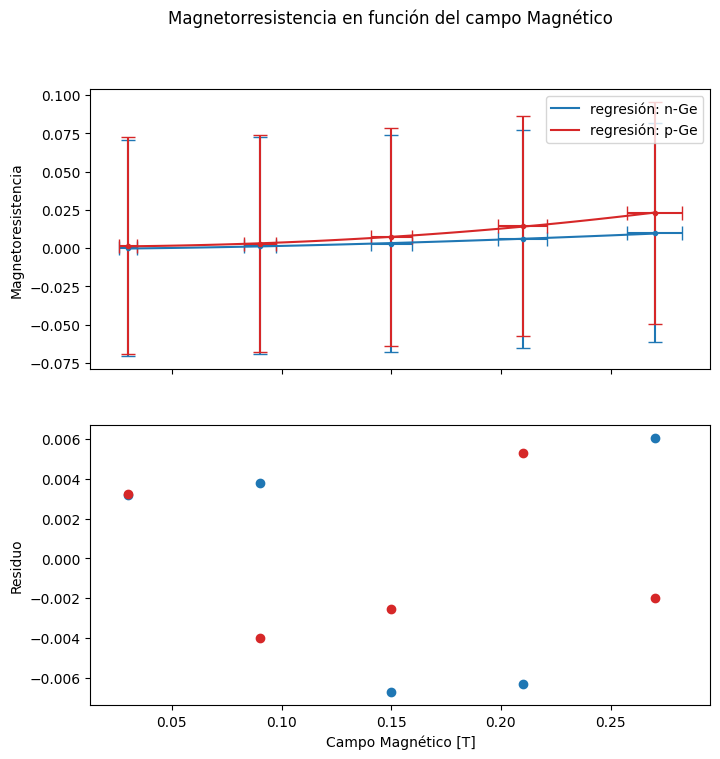

In [21]:
linea1 = miliCampo.split('\n')
linea2 = VlstrN.split('\n')
linea3 = VlstrP.split('\n')

campo = np.array(linea1, dtype=float)*0.001
Vl_n = np.array(linea2, dtype=float)
Vl_p = np.array(linea3, dtype=float)

delta_campo = DeltaCampo(campo)
delta_Vl = (np.zeros_like(Vl_n) + 0.001)

I0 = 20*0.001
delta_I = 1*0.001

Rm_n = Vl_n/I0
Rm_p = Vl_p/I0

delta_Rm_n = Rm_n*np.sqrt((delta_I/I0)**2+(delta_Vl/Vl_n)**2)
delta_Rm_p = Rm_p*np.sqrt((delta_I/I0)**2+(delta_Vl/Vl_p)**2)

y_n = (Rm_n-R0_n)/R0_n
y_p = (Rm_p-R0_p)/R0_p

delta_y_n = np.sqrt((delta_Rm_n/R0_n)**2 + (Rm_n*delta_R0_n/(R0_n**2))**2)
delta_y_p = np.sqrt((delta_Rm_p/R0_p)**2 + (Rm_p*delta_R0_p/(R0_p**2))**2)

def funcion(B, a, b, e):
    return a*(B**b) + e

def funcion_error(params, x_data, y_data):
    a, b, e = params
    y_pred = funcion(x_data, a, b, e)
    error = np.sum((y_data - y_pred)**2)
    return error

params0 = [1, 1, 1]

resultado_n = minimize(funcion_error, params0, args=(campo, y_n))
resultado_p = minimize(funcion_error, params0, args=(campo, y_p))

a_n, b_n, e_n = resultado_n.x
a_p, b_p, e_p = resultado_p.x

campo_x = np.linspace(min(campo),max(campo),100)

reg_n = funcion(campo_x, a_n, b_n, e_n)
reg_p = funcion(campo_x, a_p, b_p, e_p)

res_n = (y_n - funcion(campo, a_n, b_n, e_n))/delta_y_n
res_p = (y_p - funcion(campo, a_p, b_p, e_p))/delta_y_p

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
plt.suptitle("Magnetorresistencia en función del campo Magnético")

ax1.errorbar(campo, y_n, yerr=delta_y_n, xerr=delta_campo, color="#1f77b4", fmt=".", capsize=4.9)
ax1.errorbar(campo, y_p, yerr=delta_y_p, xerr=delta_campo, color="#d62728", fmt=".", capsize=4.9)
ax1.plot(campo_x, reg_n, label="regresión: n-Ge", color="#1f77b4")
ax1.plot(campo_x, reg_p, label="regresión: p-Ge", color="#d62728")
ax1.set_ylabel("Magnetoresistencia")
ax1.legend()

ax2.scatter(campo, res_n, label="n-Ge", color="#1f77b4")
ax2.scatter(campo, res_p, label="p-Ge", color="#d62728")
ax2.set_ylabel("Residuo")
ax2.set_xlabel("Campo Magnético [T]")

fig.savefig("Res_Efectiva.jpg")
a_n, b_n, e_n, " " ,a_p, b_p, e_p

In [22]:
hess_inv_n = resultado_n.hess_inv
hess_inv_p = resultado_p.hess_inv

delta_a_n = np.sqrt(hess_inv_n[0, 0])
delta_b_n = np.sqrt(hess_inv_n[1, 1])
delta_e_n = np.sqrt(hess_inv_n[2, 2])

delta_a_p = np.sqrt(hess_inv_p[0, 0])
delta_b_p = np.sqrt(hess_inv_p[1, 1])
delta_e_p = np.sqrt(hess_inv_p[2, 2])

delta_a_n, delta_b_n, delta_e_n, "" , delta_a_p, delta_b_p, delta_e_p

(7.33027795283043,
 3.694359991113786,
 0.5178969927996205,
 '',
 91.27512095097318,
 206.1143424956731,
 0.6703754574289706)

# Actividad 4

### 1-

In [23]:
Tem = """100
90
80
70
60
50
40
30"""

VlstrN = """0.909
1.065
1.171
1.230
1.235
1.206
1.162
1.109"""

VlstrP = """1.197
1.32
1.35
1.335
1.28
1.215
1.141
1.07"""

VlstrI = """0.23
0.28
0.38
0.550
0.8
1.118
1.77
2.69"""

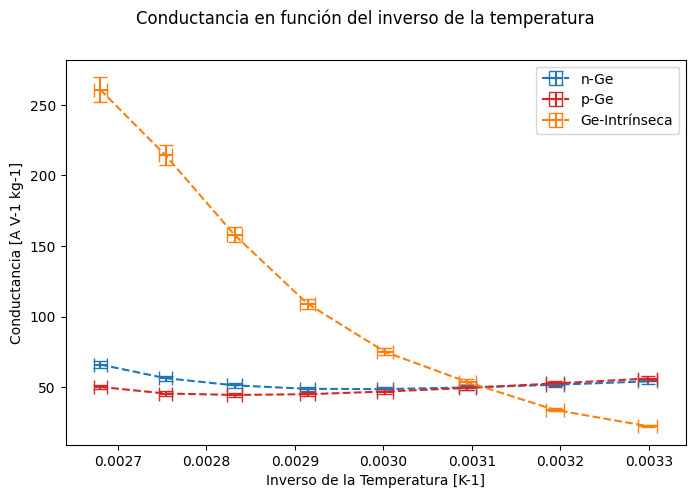

In [24]:
linea1 = Tem.split('\n')
linea2 = VlstrN.split('\n')
linea3 = VlstrP.split('\n')
linea4 = VlstrI.split('\n')

T = np.array(linea1, dtype=float)+273.15
Vl_n = np.array(linea2, dtype=float)
Vl_p = np.array(linea3, dtype=float)
Vl_i = np.array(linea4, dtype=float)

Ip = 30*0.001
w = 1e-3
l = 2e-2
d = 1e-2

delta_T = 1/(T**2)
delta_Ip = 1*0.001
delta_Vl = (np.zeros_like(Vl_n) + 0.001)

conduc_n = l*Ip/(Vl_n*w*d)
conduc_p = l*Ip/(Vl_p*w*d)
conduc_i = l*Ip/(Vl_i*w*d)

delta_conduc_n = conduc_n*np.sqrt((delta_Vl/Vl_n)**2 + (delta_Ip/Ip)**2)
delta_conduc_p = conduc_p*np.sqrt((delta_Vl/Vl_p)**2 + (delta_Ip/Ip)**2)
delta_conduc_i = conduc_i*np.sqrt((delta_Vl/Vl_i)**2 + (delta_Ip/Ip)**2)

fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(8, 5))
plt.suptitle("Conductancia en función del inverso de la temperatura")

ax1.errorbar(1/T, conduc_n, yerr=delta_conduc_n, xerr=delta_T, label="n-Ge", color="#1f77b4", fmt="--", capsize=4.9)
ax1.errorbar(1/T, conduc_p, yerr=delta_conduc_p, xerr=delta_T, label="p-Ge", color="#d62728", fmt="--", capsize=4.9)
ax1.errorbar(1/T, conduc_i, yerr=delta_conduc_i, xerr=delta_T, label="Ge-Intrínseca", color="#ff7f0e", fmt="--", capsize=4.9)
ax1.set_ylabel("Conductancia [A V-1 kg-1]")
ax1.set_xlabel("Inverso de la Temperatura [K-1]")
ax1.legend()

fig.savefig("Conductancia_Temperatura.jpg")

### 2-

In [25]:
V_hallN = """-21.9
-28.3
-35.1
-40.9
-44.6
-46.7
-47.9
-48.9"""

V_hallP = """14.1
22.5
34.2
39.9
45.2
48.4
49.1
49.8"""

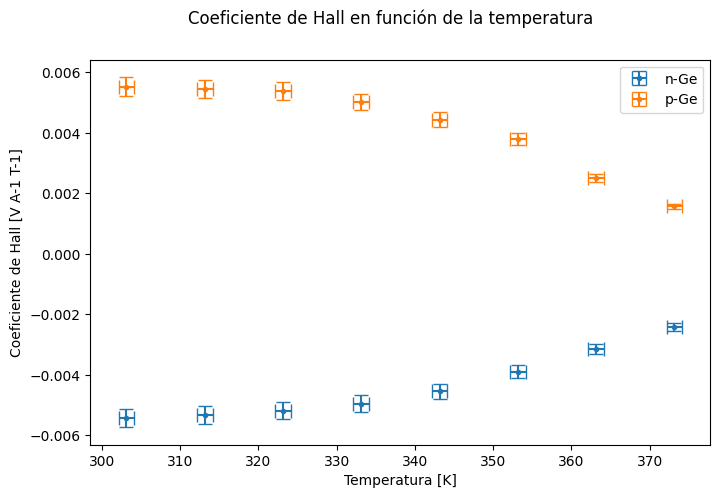

In [26]:
linea1 = Tem.split('\n')
linea2 = V_hallN.split('\n')
linea3 = V_hallP.split('\n')

T = np.array(linea1, dtype=float)+273.15
VH_n = np.array(linea2, dtype=float)*0.001
VH_p = np.array(linea3, dtype=float)*0.001

B = 300*0.001
Ip = 30*0.001
w = 1e-3
l = 2e-2
d = 1e-2

delta_T = 1
delta_VH = (np.zeros_like(VH_n) + 0.1)*0.001
delta_Ip = 1*0.001
delta_B = DeltaCampo(B)

RH_n = VH_n*w/(Ip*B)
RH_p = VH_p*w/(Ip*B)

delta_RH_n = np.abs(RH_n)*np.sqrt((delta_VH/VH_n)**2 + (delta_Ip/Ip)**2 + (delta_B/B)**2)
delta_RH_p = np.abs(RH_p)*np.sqrt((delta_VH/VH_p)**2 + (delta_Ip/Ip)**2 + (delta_B/B)**2)

fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(8, 5))
plt.suptitle("Coeficiente de Hall en función de la temperatura")

ax1.errorbar(T, RH_n, yerr=delta_RH_n, xerr=delta_T, label="n-Ge", fmt=".", capsize=4.9)
ax1.errorbar(T, RH_p, yerr=delta_RH_p, xerr=delta_T, label="p-Ge", fmt=".", capsize=4.9)
ax1.set_ylabel("Coeficiente de Hall [V A-1 T-1]")
ax1.legend()
ax1.set_xlabel("Temperatura [K]")

fig.savefig("Hall_Temperatura.jpg")

### 3-

({'m': 2560.2063917076084,
  'c': -3.9875114160709266,
  'delta_m': 518.9400546745765,
  'delta_c': 1.4301310591252296,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>},
 {'m': 5288.254172321004,
  'c': -11.735346528917363,
  'delta_m': 520.162360362394,
  'delta_c': 1.4336207468773898,
  'fun': <function __main__.regresionLineal.<locals>.<lambda>(x0)>})

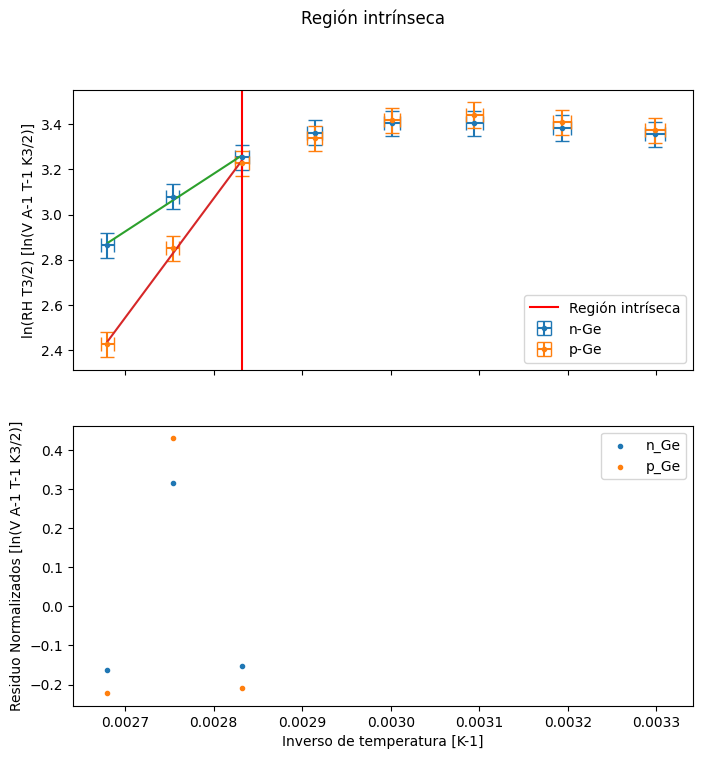

In [27]:
y_n = np.log(np.abs(RH_n*T**(3/2)))
y_p = np.log(np.abs(RH_p*T**(3/2)))

x = 1/T

delta_y_n = np.sqrt((delta_RH_n/RH_n)**2 + (delta_T/T)**2)
delta_y_p = np.sqrt((delta_RH_p/RH_p)**2 + (delta_T/T)**2)

delta_x = 1/(T**2)

y_i_n = y_n[:3]
y_i_p = y_p[:3]

x_i = x[:3]

delta_y_i_n = delta_y_n[:3]
delta_y_i_p = delta_y_p[:3]

reg_n = regresionLineal(x_i,y_i_n,delta_y_i_n)
reg_p = regresionLineal(x_i,y_i_p,delta_y_i_p)

y_reg_n = reg_n["fun"](x_i)
y_reg_p = reg_p["fun"](x_i)

res_n = (y_i_n-y_reg_n)/delta_y_i_n
res_p = (y_i_p-y_reg_p)/delta_y_i_p

fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
plt.suptitle("Región intrínseca")

ax1.errorbar(x, y_n, yerr=delta_y_n, xerr=delta_x, label="n-Ge", fmt=".", capsize=4.9)
ax1.errorbar(x, y_p, yerr=delta_y_p, xerr=delta_x, label="p-Ge", fmt=".", capsize=4.9)
ax1.plot(x_i,y_reg_n)
ax1.plot(x_i,y_reg_p)
ax1.axvline(x = x[2], label="Región intríseca", color="red")
ax1.set_ylabel("ln(RH T3/2) [ln(V A-1 T-1 K3/2)]")
ax1.legend()


ax2.scatter(x_i,res_n, label="n_Ge", marker=".")
ax2.scatter(x_i,res_p, label="p_Ge", marker=".")
ax2.set_ylabel("Residuo Normalizados [ln(V A-1 T-1 K3/2)]")
ax2.set_xlabel("Inverso de temperatura [K-1]")
ax2.legend()

fig.savefig("Energia_temperatura.jpg")
reg_n,reg_p

In [28]:
k = 1.380649e-23

E_n = 2*reg_n["m"]*k
E_p = 2*reg_p["m"]*k

delta_E_n = 2*k*reg_n["delta_m"]
delta_E_p = 2*k*reg_p["delta_m"]

E_n,delta_E_n , E_p, delta_E_p

(7.069492789009436e-20,
 1.4329481350927986e-20,
 1.4602445669521645e-19,
 1.436323285343958e-20)

## 4-

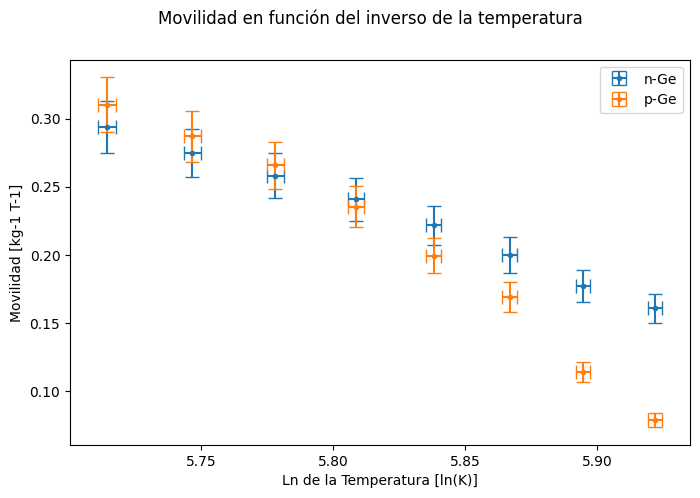

In [29]:
movi_n = np.abs(conduc_n*RH_n) 
movi_p = np.abs(conduc_p*RH_p )

delta_movi_n = movi_n*np.sqrt((delta_conduc_n/conduc_n)**2 + (delta_RH_n/RH_n)**2)
delta_movi_p = movi_p*np.sqrt((delta_conduc_p/conduc_p)**2 + (delta_RH_p/RH_p)**2)

x = np.log(T)
delta_x = 1/T

fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(8, 5))
plt.suptitle("Movilidad en función del inverso de la temperatura")

ax1.errorbar(x, movi_n, yerr=delta_movi_n, xerr=delta_x, label="n-Ge", fmt=".", capsize=4.9)
ax1.errorbar(x, movi_p, yerr=delta_movi_p, xerr=delta_x, label="p-Ge", fmt=".", capsize=4.9)
ax1.set_ylabel("Movilidad [kg-1 T-1]")
ax1.set_xlabel("Ln de la Temperatura [ln(K)]")
ax1.legend()

fig.savefig("Movilidad_Temperatura.jpg")